<a href="https://colab.research.google.com/github/prachikane/final_year_project/blob/main/Linear_Regression_and_Polynomial_Regression_Minutewise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# **Reading Data**

---



---



In [ ]:
df=pd.read_csv('/content/drive/My Drive/ASIANPAINT__EQ__NSE__NSE__MINUTE.csv')
df.head()

,timestamp,open,high,low,close,volume
0,2017-01-02 09:15:00+05:30,892.55,893.10,891.05,893.0,7599.0
1,2017-01-02 09:16:00+05:30,893.95,894.85,893.20,893.8,3384.0
2,2017-01-02 09:17:00+05:30,893.40,893.95,893.00,893.2,2638.0
3,2017-01-02 09:18:00+05:30,892.25,893.20,891.75,892.5,103839.0
4,2017-01-02 09:19:00+05:30,893.00,893.65,892.70,893.5,1696.0


### **Printing Correlation Matrix**

In [ ]:
df.corr()


,open,high,low,close,volume
open,1.000000,0.999992,0.999992,0.999988,0.133643
high,0.999992,1.000000,0.999985,0.999993,0.134774
low,0.999992,0.999985,1.000000,0.999993,0.132577
close,0.999988,0.999993,0.999993,1.000000,0.133736
volume,0.133643,0.134774,0.132577,0.133736,1.000000


In [ ]:
df['time']=df.index

In [ ]:
df.describe()
df.dropna(inplace=True)

In [ ]:
df.corr()

,open,high,low,close,volume,time
open,1.000000,0.999992,0.999992,0.999988,0.133643,0.920845
high,0.999992,1.000000,0.999985,0.999993,0.134774,0.920969
low,0.999992,0.999985,1.000000,0.999993,0.132577,0.920706
close,0.999988,0.999993,0.999993,1.000000,0.133736,0.920845
volume,0.133643,0.134774,0.132577,0.133736,1.000000,0.161460
time,0.920845,0.920969,0.920706,0.920845,0.161460,1.000000


### **Determining Independent Variables**

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


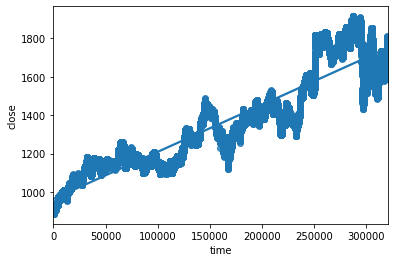

In [ ]:
sns.regplot(x="time",y="close",data=df)

# **Training Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
lm=LinearRegression()
X=df[['time']]
y=df['close']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.score(X_train,y_train)

0.84799336653877

In [ ]:
lm.score(X_test,y_test)

0.847858396911003

# **Training Polynomial Regression Model**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X1=df[['time']]
y1=df[['close']]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures 

In [ ]:
polynomial = PolynomialFeatures(degree = 6) 
X_polynomial = polynomial.fit_transform(X1) 
  
polynomial.fit(X_polynomial, y) 
lm2 = LinearRegression() 
lm2.fit(X_polynomial, y1) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm2.score(X_polynomial,y1)

0.8447505563583277

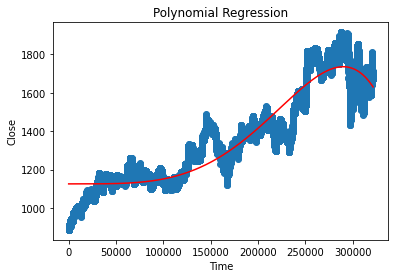

In [ ]:
plt.scatter(X1, y1) 
  
plt.plot(X1, lm2.predict(polynomial.fit_transform(X1)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Time') 

plt.ylabel('Close') 
  
plt.show() 